<h1> Cookie Cats A/b testing </h1>


In this notebook, we rely on data from one mobile game called “Cookie Cats”, developed by Tactile Entertainment. This is a standard match-3 puzzle where players need to connect pieces of the same colors to save the board and stay in the level.

As players progress through levels, they encounter gate blockers that force them to either wait a long time or make an in-game purchase to continue playing. In addition to the fact that these gates bring money to the developers from purchases, they also force players to take a break, in the hope that they will return with renewed vigor and begin to enjoy the cats again.

But the question arises - when and where to install these gates? Initially, the first gate was at level 30 of the game, but in this notebook we will analyze the AB test, in which the developers moved the gate to level 40.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("cookie_cats.csv", sep=',')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


<Axes: xlabel='version', ylabel='count'>

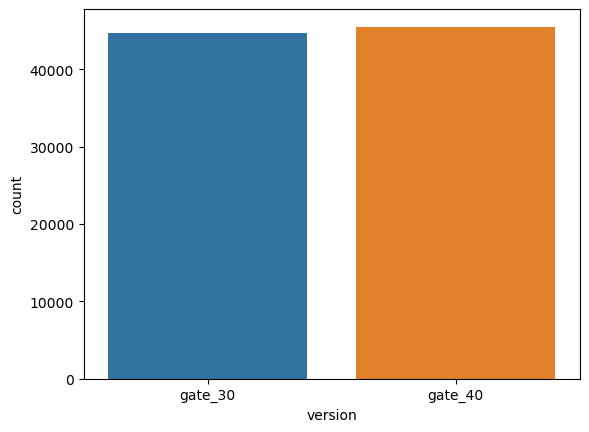

In [6]:
df30 = df[df['version'] == 'gate_30']
df40 = df[df['version'] == 'gate_40']
sns.countplot(df, x=df['version'])

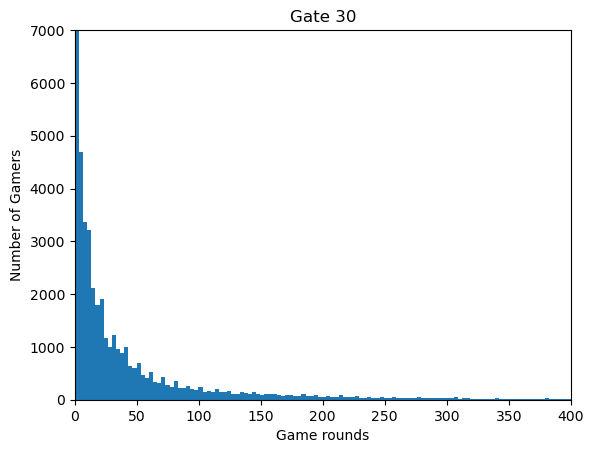

In [7]:
fig, ax = plt.subplots()
ax.hist(df30[df30['sum_gamerounds'] < 1000]['sum_gamerounds'], 300)
ax.set(xlim=(0, 400), ylim = (0, 7000))
plt.title('Gate 30')
plt.xlabel('Game rounds')
plt.ylabel('Number of Gamers')
plt.show()

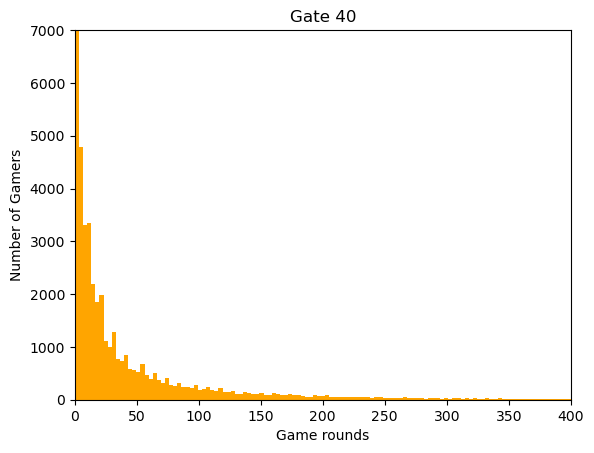

In [8]:
fig, ax = plt.subplots()
ax.hist(df40[df40['sum_gamerounds'] < 1000]['sum_gamerounds'], 300, color='orange')
ax.set(xlim=(0, 400), ylim = (0, 7000))
plt.title('Gate 40')
plt.xlabel('Game rounds')
plt.ylabel('Number of Gamers')
plt.show()

In [9]:
print(df30['sum_gamerounds'].mean(), df40['sum_gamerounds'].mean())

52.45626398210291 51.29877552814966


In [10]:
print(df30['retention_1'].mean(), df40['retention_1'].mean())

0.4481879194630872 0.44228274967574577


In [11]:
print(df30['retention_7'].mean(), df40['retention_7'].mean())

0.19020134228187918 0.18200004396667327


<h2> Start of A/B Testings<br></h2>
Let's fix alpha = 0.05 <br>
For sum_gamerounds mean value we will use Ztest for mean:

In [13]:
from statsmodels.stats.weightstats import ztest

_, pval = ztest(df30['sum_gamerounds'], df40['sum_gamerounds'], value = 0, alternative='larger')
pval

0.1864531527075341

<br>
For retentions we will use Ztest for proportions

In [15]:
from statsmodels.stats.proportion import proportions_ztest

n = [df30['retention_1'].count(), df40['retention_1'].count()]
s = [df30['retention_1'].sum(), df40['retention_1'].sum()]

_, pval = proportions_ztest(s, n, value = 0, alternative='larger')
pval

0.03720482764845957

<h3>The hypo of equality of retentions_1 is rejected</h3>

In [17]:
n = [df30['retention_7'].count(), df40['retention_7'].count()]
s = [df30['retention_7'].sum(), df40['retention_7'].sum()]

_, pval = proportions_ztest(s, n, value = 0, alternative='larger')
pval

0.0007771249878071645

<h3>The hypo of equality of retentions_7 is rejected too</h3>

<h2> Conclusion </h2>
So, the results of the AB test tell us that there is significant evidence that 7-day retention in the group with gates at level 30 exceeds the group with gates at 40. This means that if we want to maintain high customer retention and have more players, we don't need to move the goalposts from level 30 to level 40.